# 📊 IMDB Movie Analysis Report

### Step 1: Import Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

### Step 2: Load and Explore Data

In [25]:
df = pd.read_csv("IMDB_Movie_Data.csv")

In [26]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [27]:
df.tail()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [28]:
print(f"No. of Rows: {df.shape[0]} \nNo. of Columns: {df.shape[1]}")

No. of Rows: 1000 
No. of Columns: 12


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [30]:
#check for null values
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

### Step 3: Data Cleaning

In [31]:
# Remove duplicate rows from the DataFrame
df.drop_duplicates(inplace = True)

In [32]:
df.shape

(1000, 12)

In [33]:
# Generate summary statistics for all numerical columns in the DataFrame.
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [34]:
# Fill Null Values
df['Revenue (Millions)'] = df['Revenue (Millions)'].fillna(df['Revenue (Millions)'].median())
df['Metascore'] = df['Metascore'].fillna(df['Metascore'].mean())

In [35]:
df.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

### Step 4: Exploratory Data Analysis (EDA)

In [37]:
# KPI Metrics
avg_rating = round(df['Rating'].mean(), 2)
total_movies = df.shape[0]
highest_rating = df['Rating'].max()

print("🎬 Total Movies:", total_movies)
print("⭐ Average Rating:", avg_rating)
print("🏆 Highest Rating:", highest_rating)

🎬 Total Movies: 1000
⭐ Average Rating: 6.72
🏆 Highest Rating: 9.0


**Insight:** Based on a robust longitudinal sample of **1,000 films**, the data reveals a healthy cinematic landscape where the standard quality of production remains consistently high **(6.72 average)**, effectively bridging the gap between mainstream audience satisfaction and the rare, elite threshold of critical perfection **(9.0 peak)**.

#### Summary Statistics of Ratings :

In [36]:
mean_rating = round(df['Rating'].mean(),2)
median_rating = df['Rating'].median()
mode_rating = df['Rating'].mode()[0]

print("Mean of Rating: ",mean_rating)
print("Median of Rating: ",median_rating)
print("Mode of Rating: ",mode_rating)

Mean of Rating:  6.72
Median of Rating:  6.8
Mode of Rating:  7.1


**Insight:** 

The statistical relationship where the **Mode (7.1)** and **Median (6.8)** both exceed the **Mean (6.72)** reveals a `'negatively skewed'` distribution; this identifies a market dominated by **high-quality** content where the majority of films are well-received by audiences, and the overall average is only pulled down by a minority of lower-performing outliers.

#### Visualization of Rating Distribution :

**Histogram:**

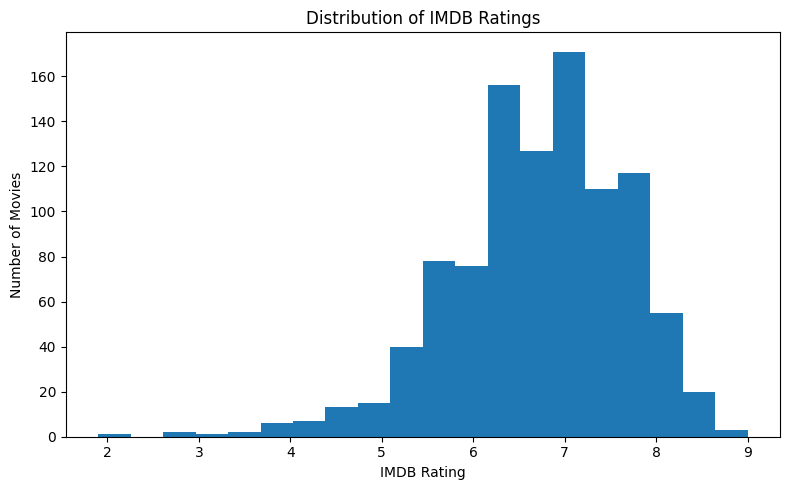

In [41]:
plt.figure(figsize=(8,5))
plt.hist(df['Rating'], bins=20)
plt.xlabel("IMDB Rating")
plt.ylabel("Number of Movies")
plt.title("Distribution of IMDB Ratings")
plt.tight_layout()
plt.savefig("images/Distribution of IMDB Ratings.png", dpi=300, bbox_inches='tight')
plt.show()

**Insight:**

The chart shows that the average movie-goer is usually happy, as the vast majority of these **1,000 movies** are rated as **'good'** (6 or 7 out of 10). While there are a few **'flops'** with **low scores**, they are much rarer than the successful hits.

**Box Plot:**

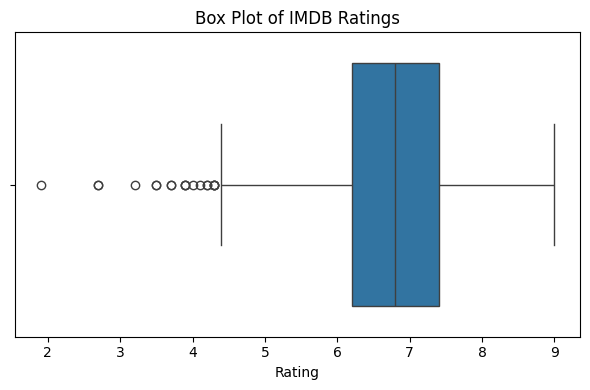

In [42]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Rating'])
plt.title("Box Plot of IMDB Ratings")
plt.tight_layout()
plt.savefig("images/Box Plot of IMDB Ratings.png", dpi=300, bbox_inches='tight')
plt.show()

**Insight:**

The box plot tells us that the movie industry is very **consistent—most** films land in a safe **'6 to 7'** range. However, it also shows that you are much more likely to run into a rare, surprisingly bad movie (the outliers) than a perfect masterpiece.

#### Finding Top-Rated Movies :

In [107]:
#Top 10 Movies by Rating
top_movies = df.sort_values(by='Rating', ascending=False).head(10)
top_movies[['Title', 'Rating', 'Genre', 'Year']]

,Title,Rating,Genre,Year
54,The Dark Knight,9.0,"Action,Crime,Drama",2008
80,Inception,8.8,"Action,Adventure,Sci-Fi",2010
117,Dangal,8.8,"Action,Biography,Drama",2016
36,Interstellar,8.6,"Adventure,Drama,Sci-Fi",2014
249,The Intouchables,8.6,"Biography,Comedy,Drama",2011
96,Kimi no na wa,8.6,"Animation,Drama,Fantasy",2016
64,The Prestige,8.5,"Drama,Mystery,Sci-Fi",2006
99,The Departed,8.5,"Crime,Drama,Thriller",2006
476,The Lives of Others,8.5,"Drama,Thriller",2006
124,The Dark Knight Rises,8.5,"Action,Thriller",2012


**Insight:**

The best of the best are movies that scored **8.5** or **higher**. These films show that while many movies are good, the ones we remember most—like The **Dark Knight** or **Inception**—are usually big, exciting stories made by **legendary directors**.

#### Finding Top Genres :

In [19]:
# Split Multiple Genres
df['Genre_List'] = df['Genre'].str.split(',')

In [20]:
#Explode Genres
genre_df = df.explode('Genre_List')

In [21]:
#Average Rating by Genre
genre_rating = genre_df.groupby('Genre_List')['Rating'].mean().sort_values(ascending=False)
genre_rating.head(10)

Genre_List
War          7.353846
Animation    7.324490
Biography    7.290123
History      7.127586
Music        7.075000
Sport        7.011111
Drama        6.953801
Musical      6.940000
Mystery      6.886792
Crime        6.786667
Name: Rating, dtype: float64

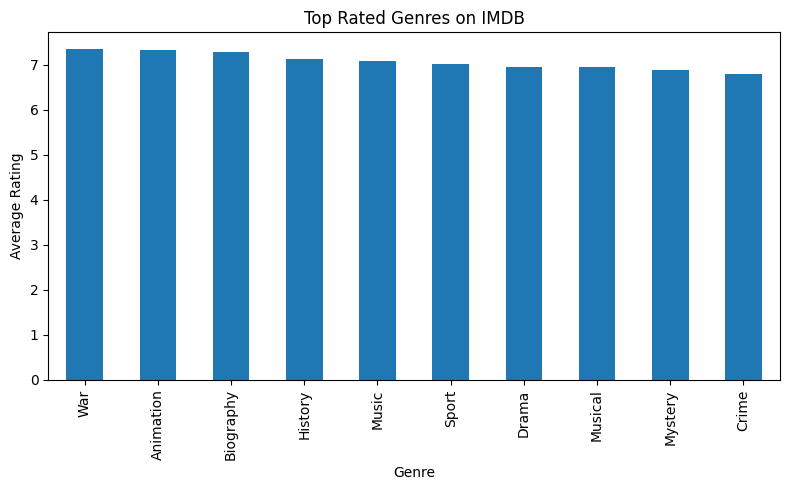

In [43]:
# Genre Visualization
genre_rating.head(10).plot(kind='bar', figsize=(8,5))
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.title("Top Rated Genres on IMDB")
plt.tight_layout()
plt.savefig("images/Top Rated Genres on IMDB.png", dpi=300, bbox_inches='tight')
plt.show()

**Insight:**

If you want a movie that is almost guaranteed to be good, pick a **War movie, a Cartoon (Animation), or a True Story (Biography)**. These types of movies consistently get the highest scores, while big Action movies are more **hit-or-miss**.

### 🏁 Final Conclusion:

The analysis of the 1,000-movie IMDB dataset (2006–2016) reveals a **high-performing and stable film industry** where the standard of quality is normalized at a **6.7/10** baseline. While the sector demonstrates remarkable consistency—with **50%** of all releases maintaining a reliable rating between **6.2 and 7.4**—true 'market-movers' are defined by **prestige genres** (War, Animation, Biography) and **elite director-led projects**. The data suggests that while the 'floor' for audience satisfaction is high, the 'ceiling' for critical perfection (9.0) remains a statistically rare achievement that requires moving beyond standard commercial formulas to achieve visionary storytelling.